In [22]:
import os
import leafmap
from samgeo import SamGeo, show_image, download_file, overlay_images, tms_to_geotiff
import numpy as np 

In [23]:
# Lüneburg coordinates: 53.2479° N, 10.4161

m = leafmap.Map(center=[53.2479, 10.4161], zoom=17, height="800px")
m.add_basemap("SATELLITE")
m

Map(center=[53.2479, 10.4161], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [24]:
# either draw rectangle with google map tools or manually with this code 
if m.user_roi_bounds() is not None:
    bbox = m.user_roi_bounds()
else:
    bbox = [10.4101, 53.2461, 10.4221, 53.2497]

bbox

[10.4321, 53.2532, 10.434, 53.2538]

In [25]:
image = "satellite.tif"
tms_to_geotiff(output=image, bbox=bbox, zoom=17, source="Satellite", overwrite=True)

Downloaded image 1/2
Downloaded image 2/2
Saving GeoTIFF. Please wait...


Exception: 

In [28]:
sam = SamGeo(
    model_type="vit_h",
    sam_kwargs=None,
)

In [29]:
sam.generate(image, output="masks.tif", foreground=True, unique=True)

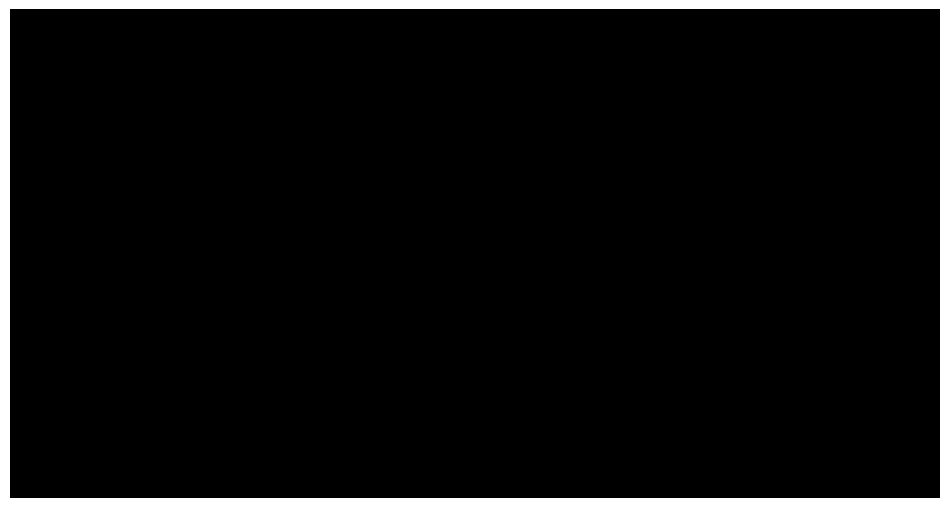

In [30]:
sam.show_masks(cmap="binary_r")

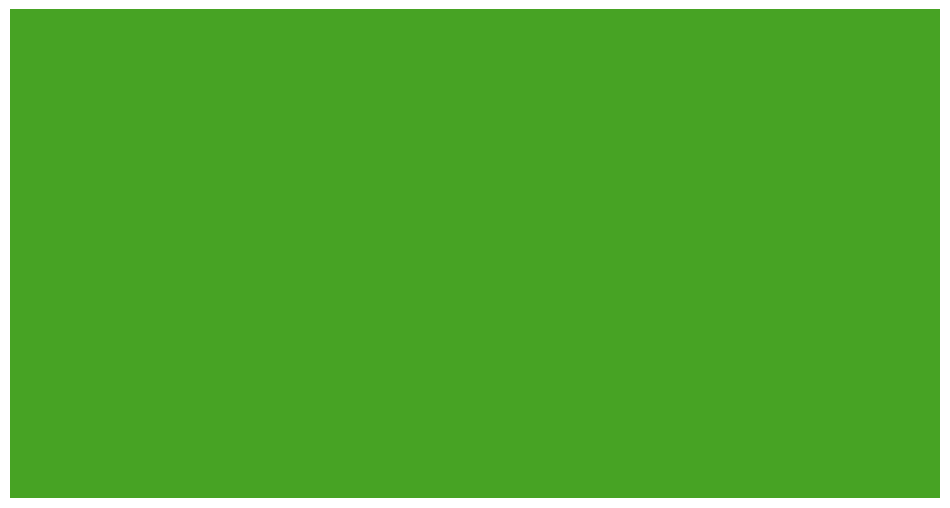

In [31]:
sam.show_anns(axis="off", alpha=1, output="annotations.tif")